In [1]:
# !pip install kaggle

In [2]:
import os, shutil, pathlib

original_dir = pathlib.Path("./src_data/train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'cats_vs_dogs_small\\train\\cat'

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs) # 0 ~ 1 사이값으로 변환
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [5]:
model.compile(loss="binary_crossentropy", # 이진분류
              optimizer="rmsprop", # 학습
              metrics=["accuracy"]) # 평가

In [6]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [7]:
callbacks = [
    keras.callbacks.ModelCheckpoint( # 베스트 모델 저장
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset, # 데이터, 레이블
    epochs=30,
    validation_data=validation_dataset, # 데이터, 레이블
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 8s 68ms/step - loss: 0.7718 - accuracy: 0.5185 - val_loss: 0.6910 - val_accuracy: 0.5070
Epoch 2/30
63/63 [==============================] - 3s 52ms/step - loss: 0.7134 - accuracy: 0.5545 - val_loss: 0.7007 - val_accuracy: 0.5110
Epoch 3/30
63/63 [==============================] - 3s 52ms/step - loss: 0.6910 - accuracy: 0.5795 - val_loss: 0.6853 - val_accuracy: 0.5880
Epoch 4/30
63/63 [==============================] - 3s 53ms/step - loss: 0.6425 - accuracy: 0.6485 - val_loss: 0.6199 - val_accuracy: 0.6510
Epoch 5/30
63/63 [==============================] - 3s 52ms/step - loss: 0.6112 - accuracy: 0.6730 - val_loss: 0.6223 - val_accuracy: 0.6750
Epoch 6/30
63/63 [==============================] - 3s 54ms/step - loss: 0.5676 - accuracy: 0.7065 - val_loss: 0.6063 - val_accuracy: 0.7020
Epoch 7/30
63/63 [==============================] - 4s 56ms/step - loss: 0.5696 - accuracy: 0.7270 - val_loss: 0.5938 - val_accuracy: 0.6640
Epoch 8/30
63

In [8]:
history.history

{'loss': [0.7718433737754822,
  0.7134032249450684,
  0.6909587383270264,
  0.6424814462661743,
  0.6112169623374939,
  0.5676000118255615,
  0.5696051716804504,
  0.5041120648384094,
  0.47027793526649475,
  0.4268046021461487,
  0.39816227555274963,
  0.3294789493083954,
  0.26592111587524414,
  0.2176465541124344,
  0.1780431717634201,
  0.12419858574867249,
  0.10601815581321716,
  0.11498197168111801,
  0.06446175277233124,
  0.09380748867988586,
  0.07973411679267883,
  0.05615110322833061,
  0.060239337384700775,
  0.10566997528076172,
  0.052335575222969055,
  0.04682232066988945,
  0.06332437694072723,
  0.04156536981463432,
  0.07734955102205276,
  0.0423295833170414],
 'accuracy': [0.5184999704360962,
  0.5544999837875366,
  0.5795000195503235,
  0.6485000252723694,
  0.6729999780654907,
  0.7064999938011169,
  0.7269999980926514,
  0.7509999871253967,
  0.781000018119812,
  0.8090000152587891,
  0.8295000195503235,
  0.8535000085830688,
  0.8899999856948853,
  0.90899997949

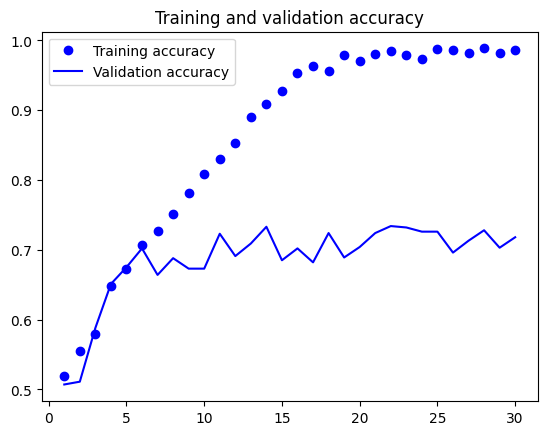

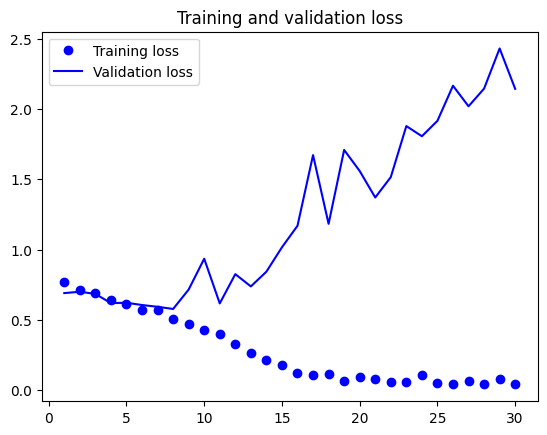

In [9]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [10]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 1s 18ms/step - loss: 0.6064 - accuracy: 0.6820
테스트 정확도: 0.682


In [11]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

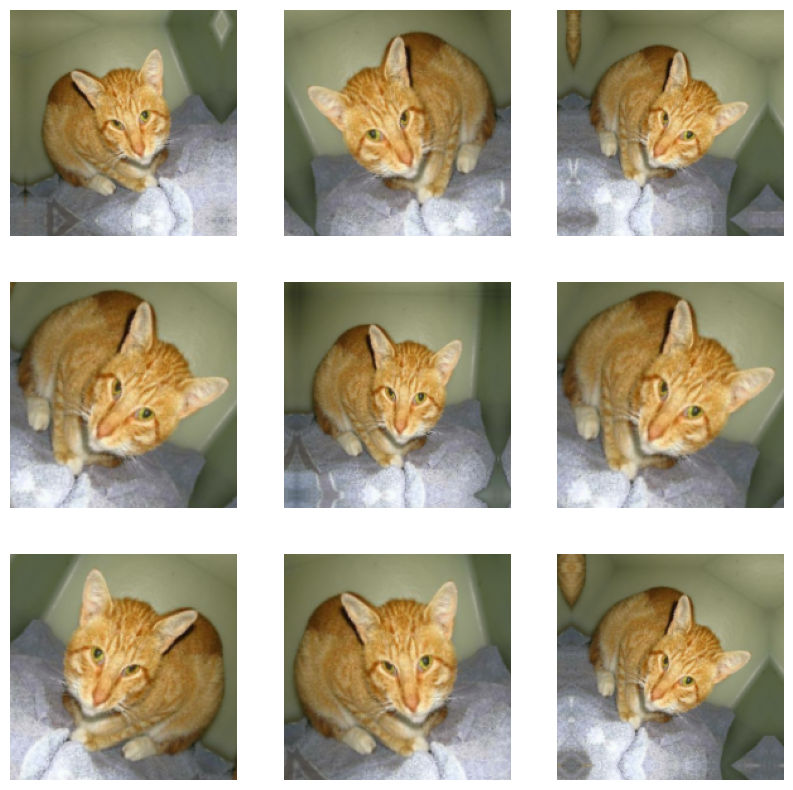

In [12]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [13]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [14]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 21s 274ms/step - loss: 0.8049 - accuracy: 0.4970 - val_loss: 0.6921 - val_accuracy: 0.5730
Epoch 2/100
63/63 [==============================] - 17s 272ms/step - loss: 0.7002 - accuracy: 0.5180 - val_loss: 0.6884 - val_accuracy: 0.5270
Epoch 3/100
63/63 [==============================] - 17s 276ms/step - loss: 0.7020 - accuracy: 0.5350 - val_loss: 0.6917 - val_accuracy: 0.5120
Epoch 4/100
63/63 [==============================] - 17s 272ms/step - loss: 0.7331 - accuracy: 0.6145 - val_loss: 0.6569 - val_accuracy: 0.5750
Epoch 5/100
63/63 [==============================] - 17s 272ms/step - loss: 0.6317 - accuracy: 0.6375 - val_loss: 0.6438 - val_accuracy: 0.6130
Epoch 6/100
63/63 [==============================] - 17s 274ms/step - loss: 0.6418 - accuracy: 0.6455 - val_loss: 0.7338 - val_accuracy: 0.5730
Epoch 7/100
63/63 [==============================] - 17s 271ms/step - loss: 0.6197 - accuracy: 0.6670 - val_loss: 1.9523 - val_accuracy:

In [15]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 1s 19ms/step - loss: 0.4996 - accuracy: 0.7625
테스트 정확도: 0.762


In [16]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 [==============================] - 3s 0us/step


In [17]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     

In [18]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 31ms/step


In [19]:
train_features.shape

(2000, 5, 5, 512)

In [20]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 1s 14ms/step - loss: 16.0359 - accuracy: 0.9195 - val_loss: 3.7029 - val_accuracy: 0.9740
Epoch 2/20
63/63 [==============================] - 0s 8ms/step - loss: 3.3912 - accuracy: 0.9765 - val_loss: 7.0831 - val_accuracy: 0.9610
Epoch 3/20
63/63 [==============================] - 0s 8ms/step - loss: 3.5229 - accuracy: 0.9780 - val_loss: 5.6456 - val_accuracy: 0.9680
Epoch 4/20
63/63 [==============================] - 1s 9ms/step - loss: 1.1430 - accuracy: 0.9900 - val_loss: 4.3792 - val_accuracy: 0.9710
Epoch 5/20
63/63 [==============================] - 1s 8ms/step - loss: 0.3391 - accuracy: 0.9965 - val_loss: 5.2778 - val_accuracy: 0.9710
Epoch 6/20
63/63 [==============================] - 1s 8ms/step - loss: 0.3899 - accuracy: 0.9965 - val_loss: 10.2344 - val_accuracy: 0.9580
Epoch 7/20
63/63 [==============================] - 1s 9ms/step - loss: 0.2302 - accuracy: 0.9975 - val_loss: 4.7776 - val_accuracy: 0.9700
Epoch 8/20
63/63 

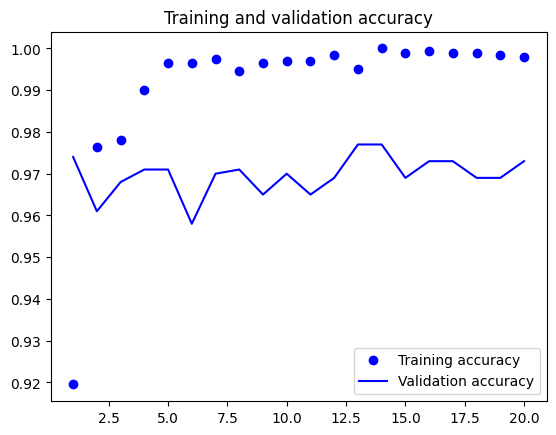

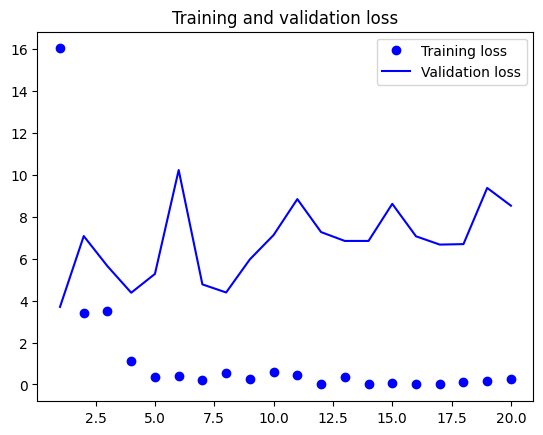

In [21]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [22]:
test_model = keras.models.load_model(
    "feature_extraction.keras")
test_loss, test_acc = test_model.evaluate(test_features,test_labels)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 1s 8ms/step - loss: 4.4785 - accuracy: 0.9680
테스트 정확도: 0.968


In [23]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

In [28]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [24]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [25]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 27s 364ms/step - loss: 17.0788 - accuracy: 0.9045 - val_loss: 3.3322 - val_accuracy: 0.9640
Epoch 2/50
63/63 [==============================] - 23s 359ms/step - loss: 6.4879 - accuracy: 0.9475 - val_loss: 7.4371 - val_accuracy: 0.9570
Epoch 3/50
63/63 [==============================] - 23s 358ms/step - loss: 5.8840 - accuracy: 0.9580 - val_loss: 7.4802 - val_accuracy: 0.9670
Epoch 4/50
63/63 [==============================] - 23s 357ms/step - loss: 5.4909 - accuracy: 0.9685 - val_loss: 6.1372 - val_accuracy: 0.9690
Epoch 5/50
63/63 [==============================] - 23s 358ms/step - loss: 4.7499 - accuracy: 0.9705 - val_loss: 7.4191 - val_accuracy: 0.9650
Epoch 6/50
63/63 [==============================] - 23s 357ms/step - loss: 3.7309 - accuracy: 0.9720 - val_loss: 5.0408 - val_accuracy: 0.9740
Epoch 7/50
63/63 [==============================] - 23s 358ms/step - loss: 2.8545 - accuracy: 0.9760 - val_loss: 4.1976 - val_accuracy: 0.977

In [26]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 7s 111ms/step - loss: 4.1436 - accuracy: 0.9750
테스트 정확도: 0.975


In [29]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [30]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 28s 387ms/step - loss: 0.4876 - accuracy: 0.9925 - val_loss: 2.8493 - val_accuracy: 0.9800
Epoch 2/30
63/63 [==============================] - 24s 385ms/step - loss: 0.3017 - accuracy: 0.9940 - val_loss: 2.6719 - val_accuracy: 0.9820
Epoch 3/30
63/63 [==============================] - 24s 381ms/step - loss: 0.6605 - accuracy: 0.9945 - val_loss: 3.5443 - val_accuracy: 0.9750
Epoch 4/30
63/63 [==============================] - 24s 381ms/step - loss: 0.0668 - accuracy: 0.9980 - val_loss: 4.0329 - val_accuracy: 0.9760
Epoch 5/30
63/63 [==============================] - 24s 383ms/step - loss: 0.2258 - accuracy: 0.9935 - val_loss: 2.3297 - val_accuracy: 0.9810
Epoch 6/30
63/63 [==============================] - 24s 382ms/step - loss: 0.2510 - accuracy: 0.9955 - val_loss: 2.7520 - val_accuracy: 0.9820
Epoch 7/30
63/63 [==============================] - 24s 380ms/step - loss: 0.1058 - accuracy: 0.9950 - val_loss: 2.8174 - val_accuracy: 0.9780

In [31]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"테스트 정확도: {test_acc:.3f}")

63/63 [==============================] - 7s 110ms/step - loss: 3.0340 - accuracy: 0.9780
테스트 정확도: 0.978
